# Aula 1 - Análise de Dados com Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape

(133349, 11)

In [7]:
linhas, colunas = df.shape
print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df.columns = [
    'ano',
    'nivel_experiencia',
    'tipo_emprego',
    'cargo',
    'salario',
    'moeda_salario',
    'salario_em_usd',
    'residencia_empregado',
    'taxa_remoto',
    'localizacao_empresa',
    'porte_empresa'
]

display(df.columns)

Index(['ano', 'nivel_experiencia', 'tipo_emprego', 'cargo', 'salario',
       'moeda_salario', 'salario_em_usd', 'residencia_empregado',
       'taxa_remoto', 'localizacao_empresa', 'porte_empresa'],
      dtype='object')

In [10]:
df["nivel_experiencia"].value_counts()

,count
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df["tipo_emprego"].value_counts()

,count
tipo_emprego,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df.columns = [
    'ano',
    'senioridade',
    'contrato',
    'cargo',
    'salario',
    'moeda',
    'usd',
    'residencia',
    'remoto',
    'empresa',
    'porte_empresa'
]

display(df.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'porte_empresa'],
      dtype='object')

In [13]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [14]:
df['senioridade'] = df['senioridade'].replace({
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
})

display(df['senioridade'].value_counts())

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [15]:
df['contrato'] = df['contrato'].replace({
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance'
})

display(df['contrato'].value_counts())

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelance,16


In [16]:
df['porte_empresa'] = df['porte_empresa'].replace({
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
})

display(df['porte_empresa'].value_counts())

,count
porte_empresa,
Média,129561
Grande,3574
Pequena,214


In [17]:
df['remoto'] = df['remoto'].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})

display(df['remoto'].value_counts())

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [18]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,porte_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [19]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [20]:
df.rename(columns={
    "porte_empresa": "tamanho_empresa"})

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021.0,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020.0,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020.0,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


# Aula 2 - Limpeza e Preparação de Dados

In [21]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [22]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [23]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [24]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [25]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele'],
    'salario': [4000, np.nan, 5000, np.nan]
})

# Calcula média salarial e substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())


In [26]:
display(df_salarios)

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.0,4000.0
1,Bruno,NaN,4500.0,4500.0
2,Carlos,5000.0,5000.0,5000.0
3,Daniele,NaN,4500.0,4500.0


In [27]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()

df_temperaturas

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [28]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [29]:
df_limpo = df.dropna()

In [30]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [31]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ano            133339 non-null  float64
 1   senioridade    133339 non-null  object 
 2   contrato       133339 non-null  object 
 3   cargo          133339 non-null  object 
 4   salario        133339 non-null  int64  
 5   moeda          133339 non-null  object 
 6   usd            133339 non-null  int64  
 7   residencia     133339 non-null  object 
 8   remoto         133339 non-null  object 
 9   empresa        133339 non-null  object 
 10  porte_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [32]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


# Aula 3 - Gráficos e História com Dados

In [33]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,porte_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

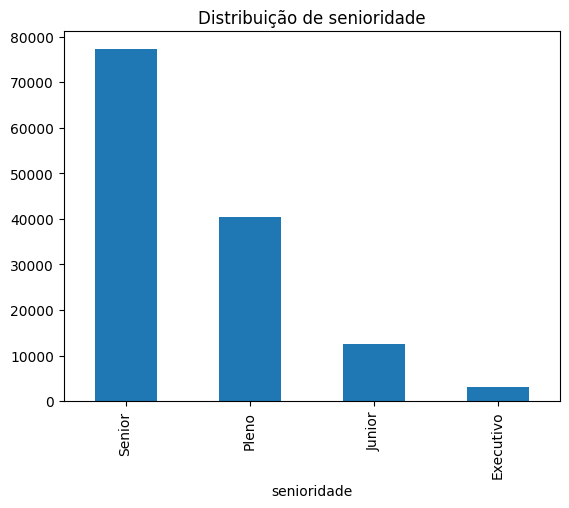

In [34]:
df_limpo["senioridade"].value_counts().plot(kind='bar', title='Distribuição de senioridade')

In [35]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

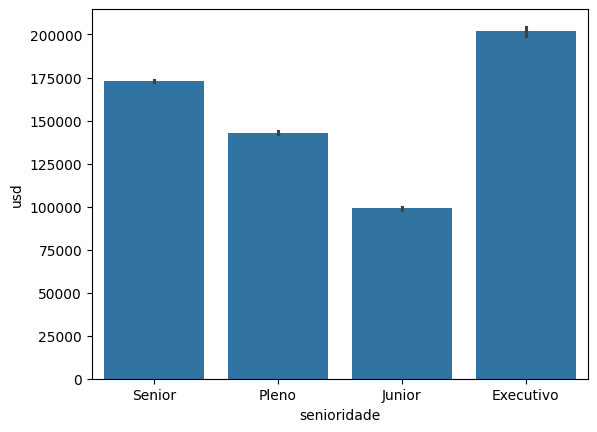

In [36]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [37]:
import matplotlib.pyplot as plt

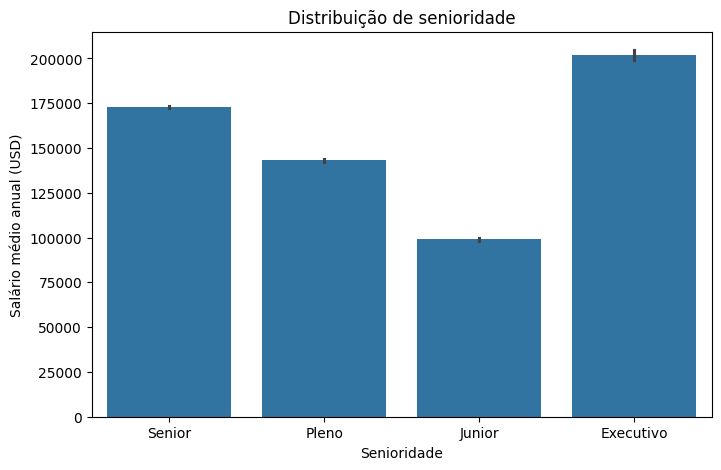

In [38]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Distribuição de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [39]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


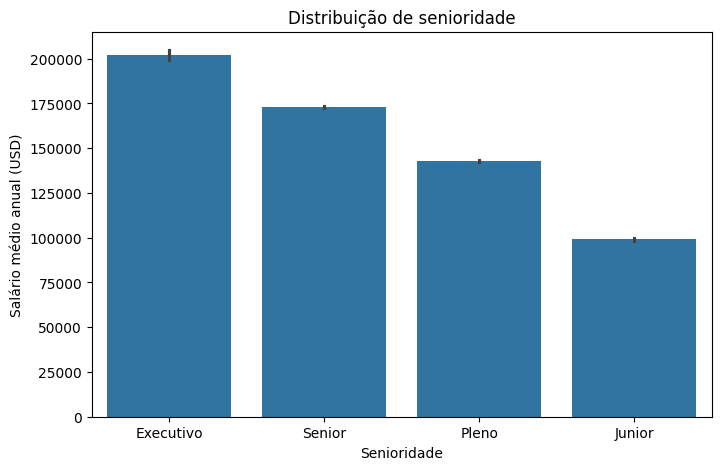

In [40]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Distribuição de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

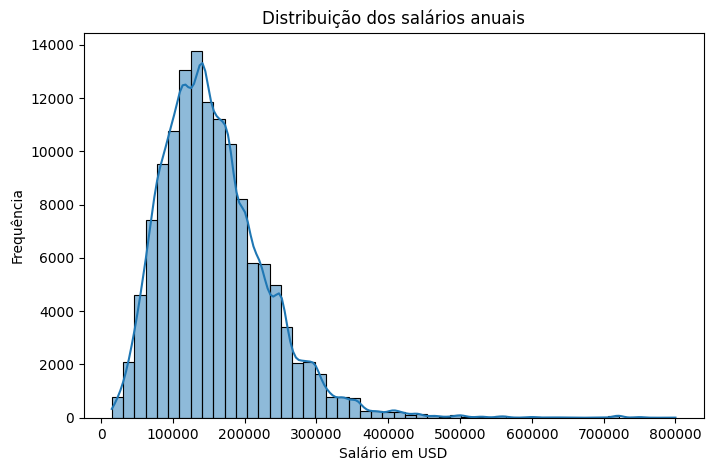

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df_limpo['usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

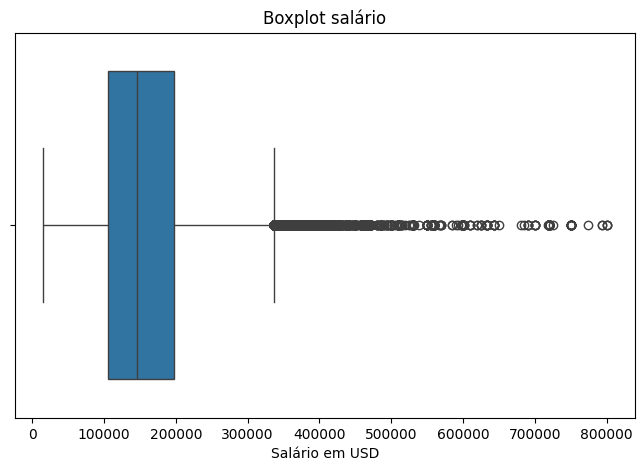

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot salário')
plt.xlabel('Salário em USD')
plt.show()

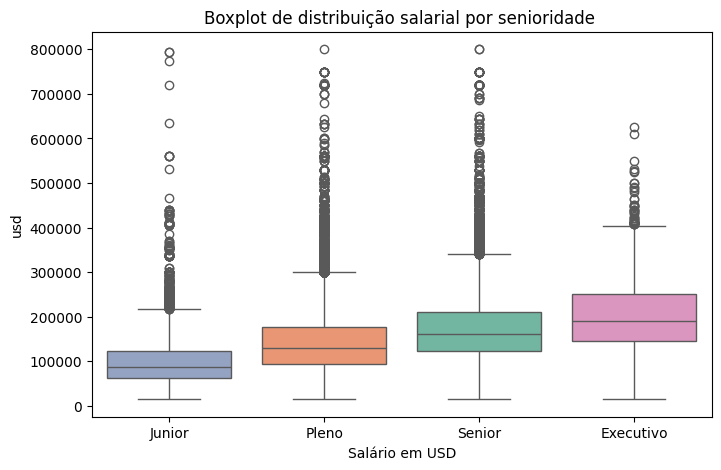

In [43]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot de distribuição salarial por senioridade ')
plt.xlabel('Salário em USD')
plt.show()

In [44]:
import plotly.express as px

In [45]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(senioridade_media_salario, x='senioridade', y='usd', title='Média salarial por senioridade', labels={'senioridade': 'Nível de senioridade', 'usd': 'Média Salarial Anual (USD)'})
fig.show()

In [46]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

In [48]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 95.7 MB/s eta 0:00:00


In [51]:
# Gráfico de média salarial de cientista de dados por país
import pycountry
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']
df_novo = df_data_scientist.groupby('residencia_iso3')['usd'].mean().reset_index()
df_novo = df_novo.sort_values(by='usd', ascending=False)
fig = px.choropleth(df_novo,
                    locations='residencia_iso3',
                    color='usd',
                    hover_name='residencia_iso3',
                    color_continuous_scale='rdylgn',
                    title='Salário Médio de Cientistas de Dados por país',
                    labels={'residencia_iso3': 'País', 'usd': 'Salário médio (USD)'})
fig.show()

In [52]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)